<a href="https://colab.research.google.com/github/Cademfitzgerald/Data-Science/blob/main/Cade_Fitzgerald_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas

https://tensorspace.org/

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
#Importing the different programs to help make the code easier

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
url = "https://docs.google.com/presentation/d/19zIdTgynR9gs-aYNMdPJvgwIHIgHYQwtfWkf5fB1lXg/edit#slide=id.p"

In [ ]:
url = "https://docs.google.com/presentation/d/1-Tg8wr8TM6oh59gmgxMpwGjsH4gcuJg6_BycGAdrR0s/edit#slide=id.g1a97f1dd776_0_145"

In [ ]:
#Importing the data of the images in from google slides so they can appear in colab

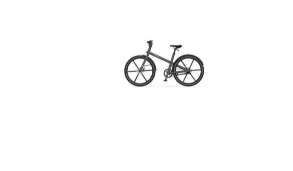

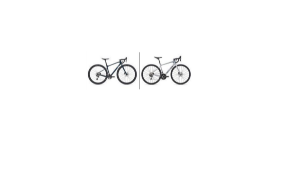

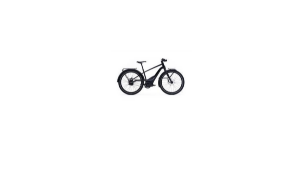

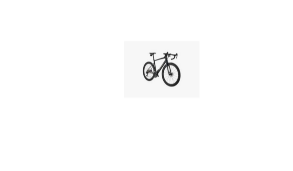

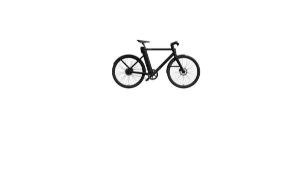

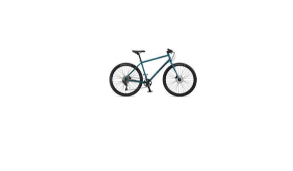

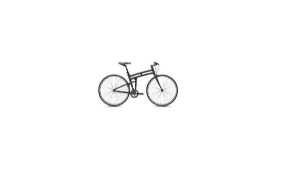

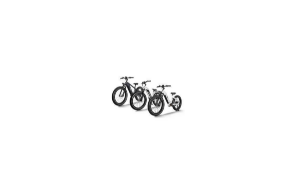

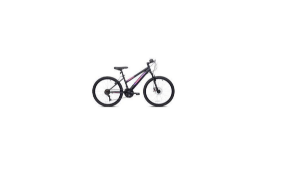

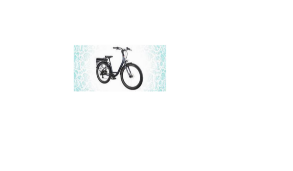

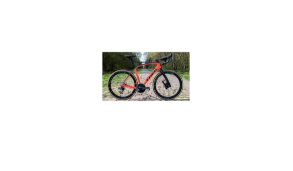

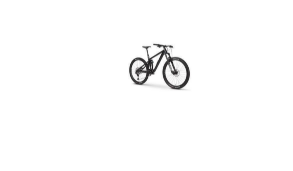

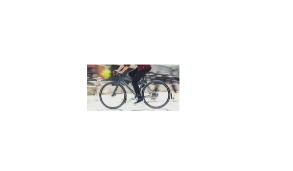

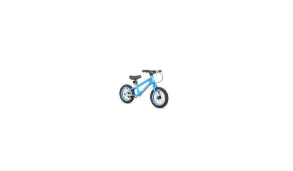

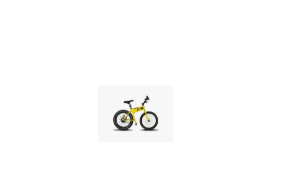

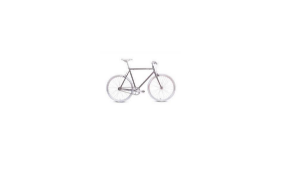

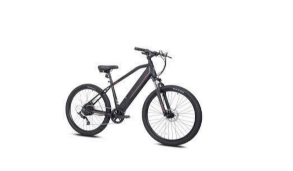

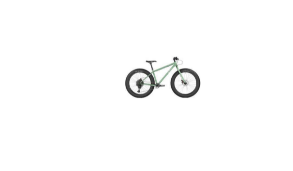

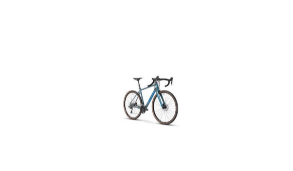

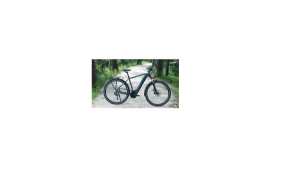

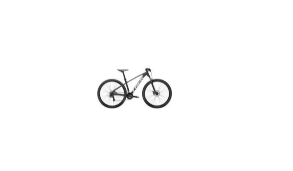

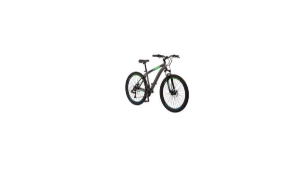

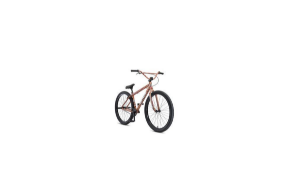

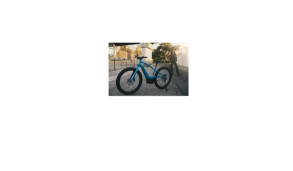

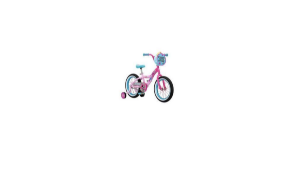

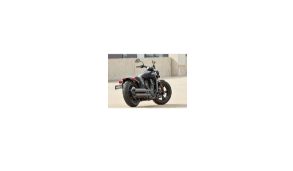

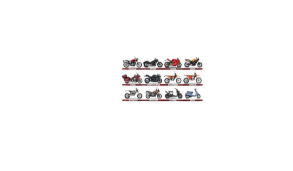

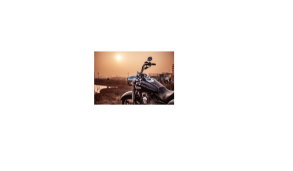

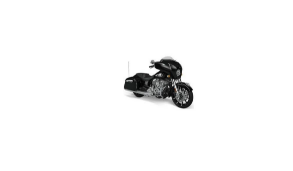

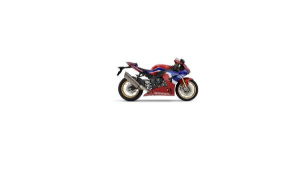

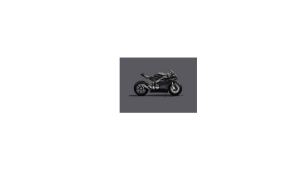

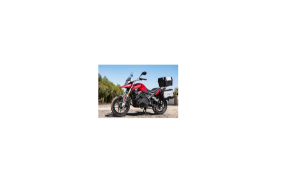

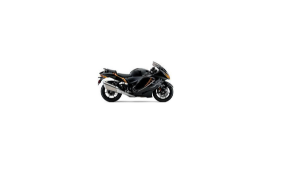

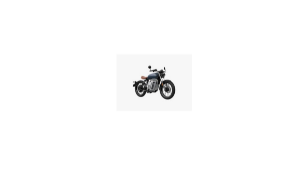

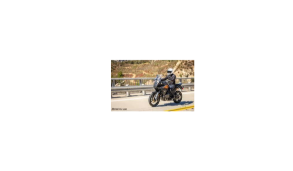

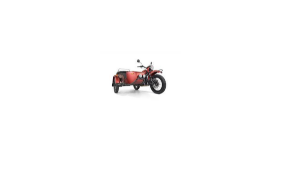

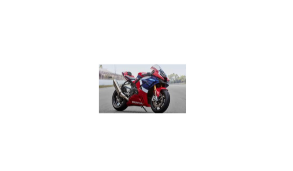

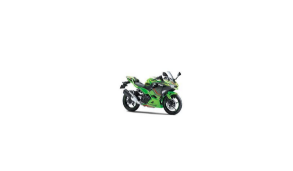

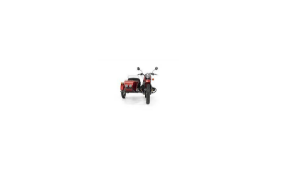

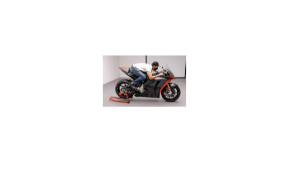

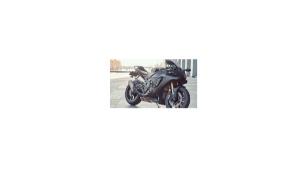

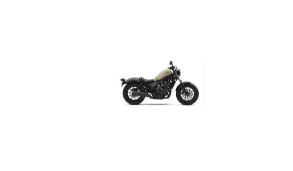

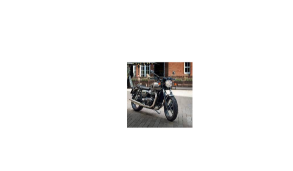

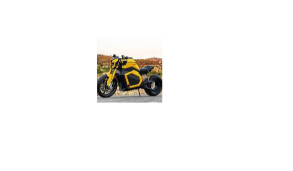

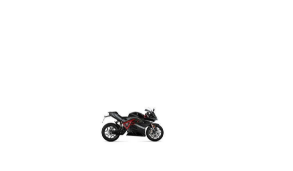

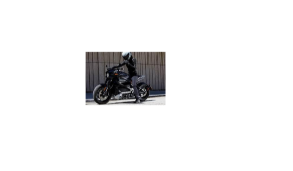

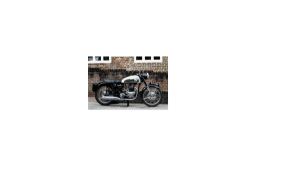

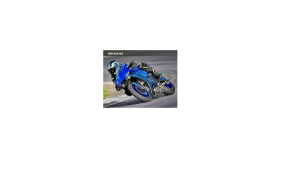

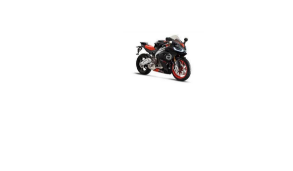

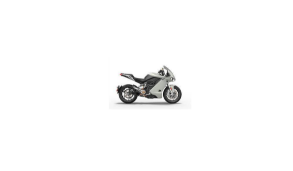

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
#The images imported from google slides

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[-1.0991, -3.5727, -4.3631,  ..., -3.8381,  1.0109,  1.8049],
        [-1.1105, -2.4441, -2.1040,  ..., -3.0604,  0.0882,  1.9947],
        [-0.3927, -2.7627, -2.9869,  ..., -3.4938,  0.8673,  1.4423],
        ...,
        [-2.6976, -3.1000, -3.3573,  ..., -4.5426, -0.4189,  2.2207],
        [-3.1597, -1.7324, -3.9938,  ..., -7.1933, -0.3620,  2.7167],
        [-0.5784, -3.5823, -4.1950,  ..., -4.2214,  0.0209,  2.4761]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
#The shape of all the different images

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

analog clock
envelope
stopwatch, stop watch
envelope
hook, claw
mountain bike, all-terrain bike, off-roader
chain
hair slide
hook, claw
envelope
magnetic compass
mountain bike, all-terrain bike, off-roader
magnetic compass
safety pin
safety pin
safety pin
tricycle, trike, velocipede
magnetic compass
mountain bike, all-terrain bike, off-roader
magnetic compass
hook, claw
mountain bike, all-terrain bike, off-roader
mountain bike, all-terrain bike, off-roader
scale, weighing machine
parachute, chute
combination lock
hair slide
web site, website, internet site, site
hair slide
moped
analog clock
web site, website, internet site, site
whistle
safety pin
web site, website, internet site, site
black widow, Latrodectus mactans
bobsled, bobsleigh, bob
magnetic compass
parachute, chute
switch, electric switch, electrical switch
half track
magnetic compass
forklift
lighter, light, igniter, ignitor
whistle
hair slide
cassette
iPod
hair slide
hair slide


In [ ]:
#Guesses based off of what the computer thinks each image is 

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#The different array of 50 numvers no greater than 1

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

In [ ]:
#The shape of x

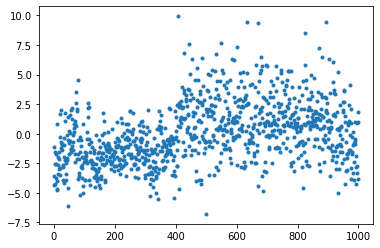

In [ ]:
plt.plot(X[0],'.')

In [ ]:
#The visuualization plotted based on the numbers assigned to each x value

In [ ]:
X[0]

array([-1.09914279e+00, -3.57268429e+00, -4.36314392e+00, -4.27988958e+00,
       -2.55277777e+00, -1.53985834e+00, -3.76735306e+00, -1.70442915e+00,
       -2.53488207e+00,  8.08728993e-01, -4.73531437e+00, -4.67943907e+00,
       -3.96065784e+00, -2.63269281e+00, -3.38559389e+00, -1.96381617e+00,
       -2.15718794e+00, -1.56005323e+00, -2.94774818e+00, -2.93067575e+00,
       -3.53198862e+00, -2.87295580e-01,  1.67529225e+00, -1.20925128e+00,
        1.97665548e+00, -7.00027287e-01, -9.37284648e-01, -1.34880424e+00,
       -8.84200931e-01, -2.84686828e+00, -2.61210227e+00, -3.95669365e+00,
       -4.15165758e+00, -9.45763588e-01, -3.26802224e-01, -1.97766554e+00,
        1.08447015e+00, -2.23190093e+00,  1.75371361e+00, -3.41019058e+00,
       -3.87453699e+00, -2.49479699e+00, -1.01525657e-01, -2.20278835e+00,
       -2.06203842e+00, -5.70743918e-01, -4.55621147e+00,  1.39758325e+00,
       -6.08704710e+00, -8.17124248e-01, -1.70895696e+00,  2.03247085e-01,
        1.55538929e+00,  

In [ ]:
np.argmax(X[0])

409

In [ ]:
labels[409]

'analog clock'

In [ ]:
#How to get a specific number and what guess the computer thinks it is

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

analog clock
wall clock
magnetic compass
mountain bike, all-terrain bike, off-roader
stopwatch, stop watch
envelope
bicycle-built-for-two, tandem bicycle, tandem
hook, claw
tricycle, trike, velocipede
barometer


In [ ]:
#How to get a certain number of guesses in this case ten it can be more can be less but its based off of the google slides images

In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
#The different guess possiblities that the computure can output

(array([  6.,  66., 181., 271., 227., 143.,  61.,  34.,   6.,   5.]),
 array([-6.782262  , -5.1113687 , -3.4404757 , -1.7695825 , -0.09868946,
         1.5722036 ,  3.2430968 ,  4.91399   ,  6.5848827 ,  8.255776  ,
         9.926669  ], dtype=float32),
 <a list of 10 Patch objects>)

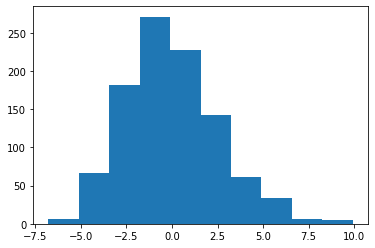

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
# different varriables that have be defined to help make the code run smoother 

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
#an if else function to help test the guesses

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

acc_train,▄▆▂▇▆▁▁▂▆▂▇▆▇█▆▂▅█▁▅▂▂▄▄▁▆▃██▃▃▆▂▂▃▂▂▃▆▆
loss,▅▃▇▂▃██▇▃▇▂▃▂▁▃▇▄▁█▄▇▇▅▅█▃▆▁▁▆▆▃▇▇▆▇▇▆▃▃
acc_train,0.34375
loss,0.96951


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
#Best = 98

In [ ]:
#Worst = 48

In [ ]:
#Avarage = 66